Notebook to compare stratification between two simulations.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
import glob
from salishsea_tools import tidetools, nc_tools
import matplotlib.dates as md

import sys
sys.path.append('/data/nsoontie/MEOPAR/mixing-paper/analysis')

import mixing
import ONC_patrols as onc

%matplotlib inline

# Load Mesh

In [2]:
grid_B = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
mesh_mask = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/mesh_mask_SalishSea2.nc')
bathy, lons, lats = tidetools.get_bathy_data(grid_B)

tmask = mesh_mask.variables['tmask'][:]
tmask = 1-tmask

gdept = mesh_mask.variables['gdept'][0,:,:,:]
gdepw = mesh_mask.variables['gdepw'][0,:,:,:]

thalweg_points, gdept_thal, xx = mixing.load_thalweg(gdept, lons, lats)


# Load files

In [3]:
start=datetime.datetime(2015,3,4)
end=datetime.datetime(2015,6,5)
home_dir = '/ocean/nsoontie/MEOPAR/SalishSea/results/mixing_paper/'

In [4]:
runs = ['base_spinup/restart3', 'holl_spinup/restart2']
grid_t={}
grid_w={}
run=runs[0]
grid_t[run] = mixing.results_dataset('1d',start,end,'grid_T',home_dir,run)
end = datetime.datetime(2015,4,26)
start=datetime.datetime(2015,1,23)
run=runs[1]
grid_t[run] = mixing.results_dataset('1d',start,end,'grid_T',home_dir,run)

In [5]:
times={}
for run in runs:
    times[run] =grid_t[run].variables['time_counter']

In [7]:
t1 = 18
print(nc.num2date(times[runs[0]][t1],units=times[runs[0]].units))
t2 = -35
print(nc.num2date(times[runs[1]][t2],units=times[runs[1]].units))

2015-03-22 12:00:00
2015-03-22 12:00:00


In [8]:
 sals={}; temps={}; avts={}; times={}; depthts={}; depthws={}

run=runs[0]
sals[run] = mixing.load_field(grid_t[run],tmask,'vosaline', t=t1)
temps[run] = mixing.load_field(grid_t[run],tmask,'votemper',t=t1)
run=runs[1]
sals[run] = mixing.load_field(grid_t[run],tmask,'vosaline', t=t2)
temps[run] = mixing.load_field(grid_t[run],tmask,'votemper',t=t2)

In [9]:
def plot_thalweg_diff(ax, var, var_name, thalweg_points, depth,  xx, runs, smin=-1,smax=1, 
                     lines=[-.5, -.25,0,.25,.5], cmap='bwr',xlim=[0,750]):
    
    diff = var[runs[1]] - var[runs[0]]
    diffP=diff[:,thalweg_points[:,0],thalweg_points[:,1]]
    mesh=ax.pcolormesh(xx,depth,diffP,vmin=smin,vmax=smax,cmap=cmap)
    
    #CS = ax.contour(xx,depth,diffP.T,lines,colors='k')
    #plt.clabel(CS)
    cbar = plt.colorbar(mesh,ax=ax)
    cbar.set_label(var_name)
    #cbar.add_lines(CS)
    
    ax.set_ylim([430,0])
    ax.set_xlim(xlim)
    ax.set_ylabel('Depth [m]')
    ax.set_title('{} - {} '.format(runs[1],runs[0]))
    print(diff.max(),diff.min())

9.3506 -7.8839
1.15654 -1.82487


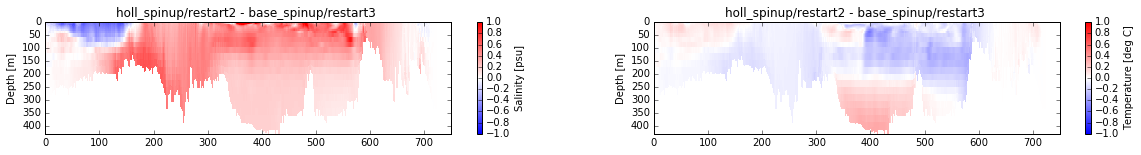

In [10]:
    fig,axs = plt.subplots(1,2,figsize=(20,2))
    ax=axs[0]
    plot_thalweg_diff(ax, sals, 'Salinity [psu]', thalweg_points, gdept_thal, xx, runs,
                     smin=-1, smax=1)
    ax=axs[1]
    plot_thalweg_diff(ax, temps, 'Temperature [deg C]',  thalweg_points, gdept_thal,xx,runs,
                     smin=-1, smax=1)

# Surface

In [15]:
def plot_surface(ax,d, var, var_name, run, smin=0,smax=34,cmap='Spectral_r'):
    
    mesh=ax.pcolormesh(var[d,:,:],vmin=smin,vmax=smax,cmap=cmap)
    
    cbar = plt.colorbar(mesh,ax=ax)
    cbar.set_label(var_name)
    
    ax.set_title('{} '.format(run))

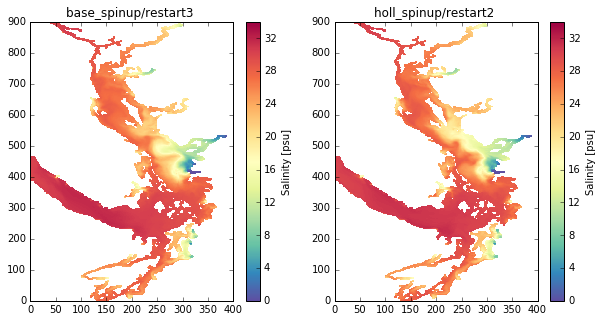

In [16]:
d=0
fig,axs = plt.subplots(1,2,figsize=(10,5))
for run, ax in zip(runs,axs):
    sal = sals[run]
    plot_surface(ax, d,sal, 'Salinity [psu]', run)
